# Import Tools needed and load the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('datasets_3537_5680_HousingData.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


# Exploratory Data Analysis (EDA)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [4]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560262,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

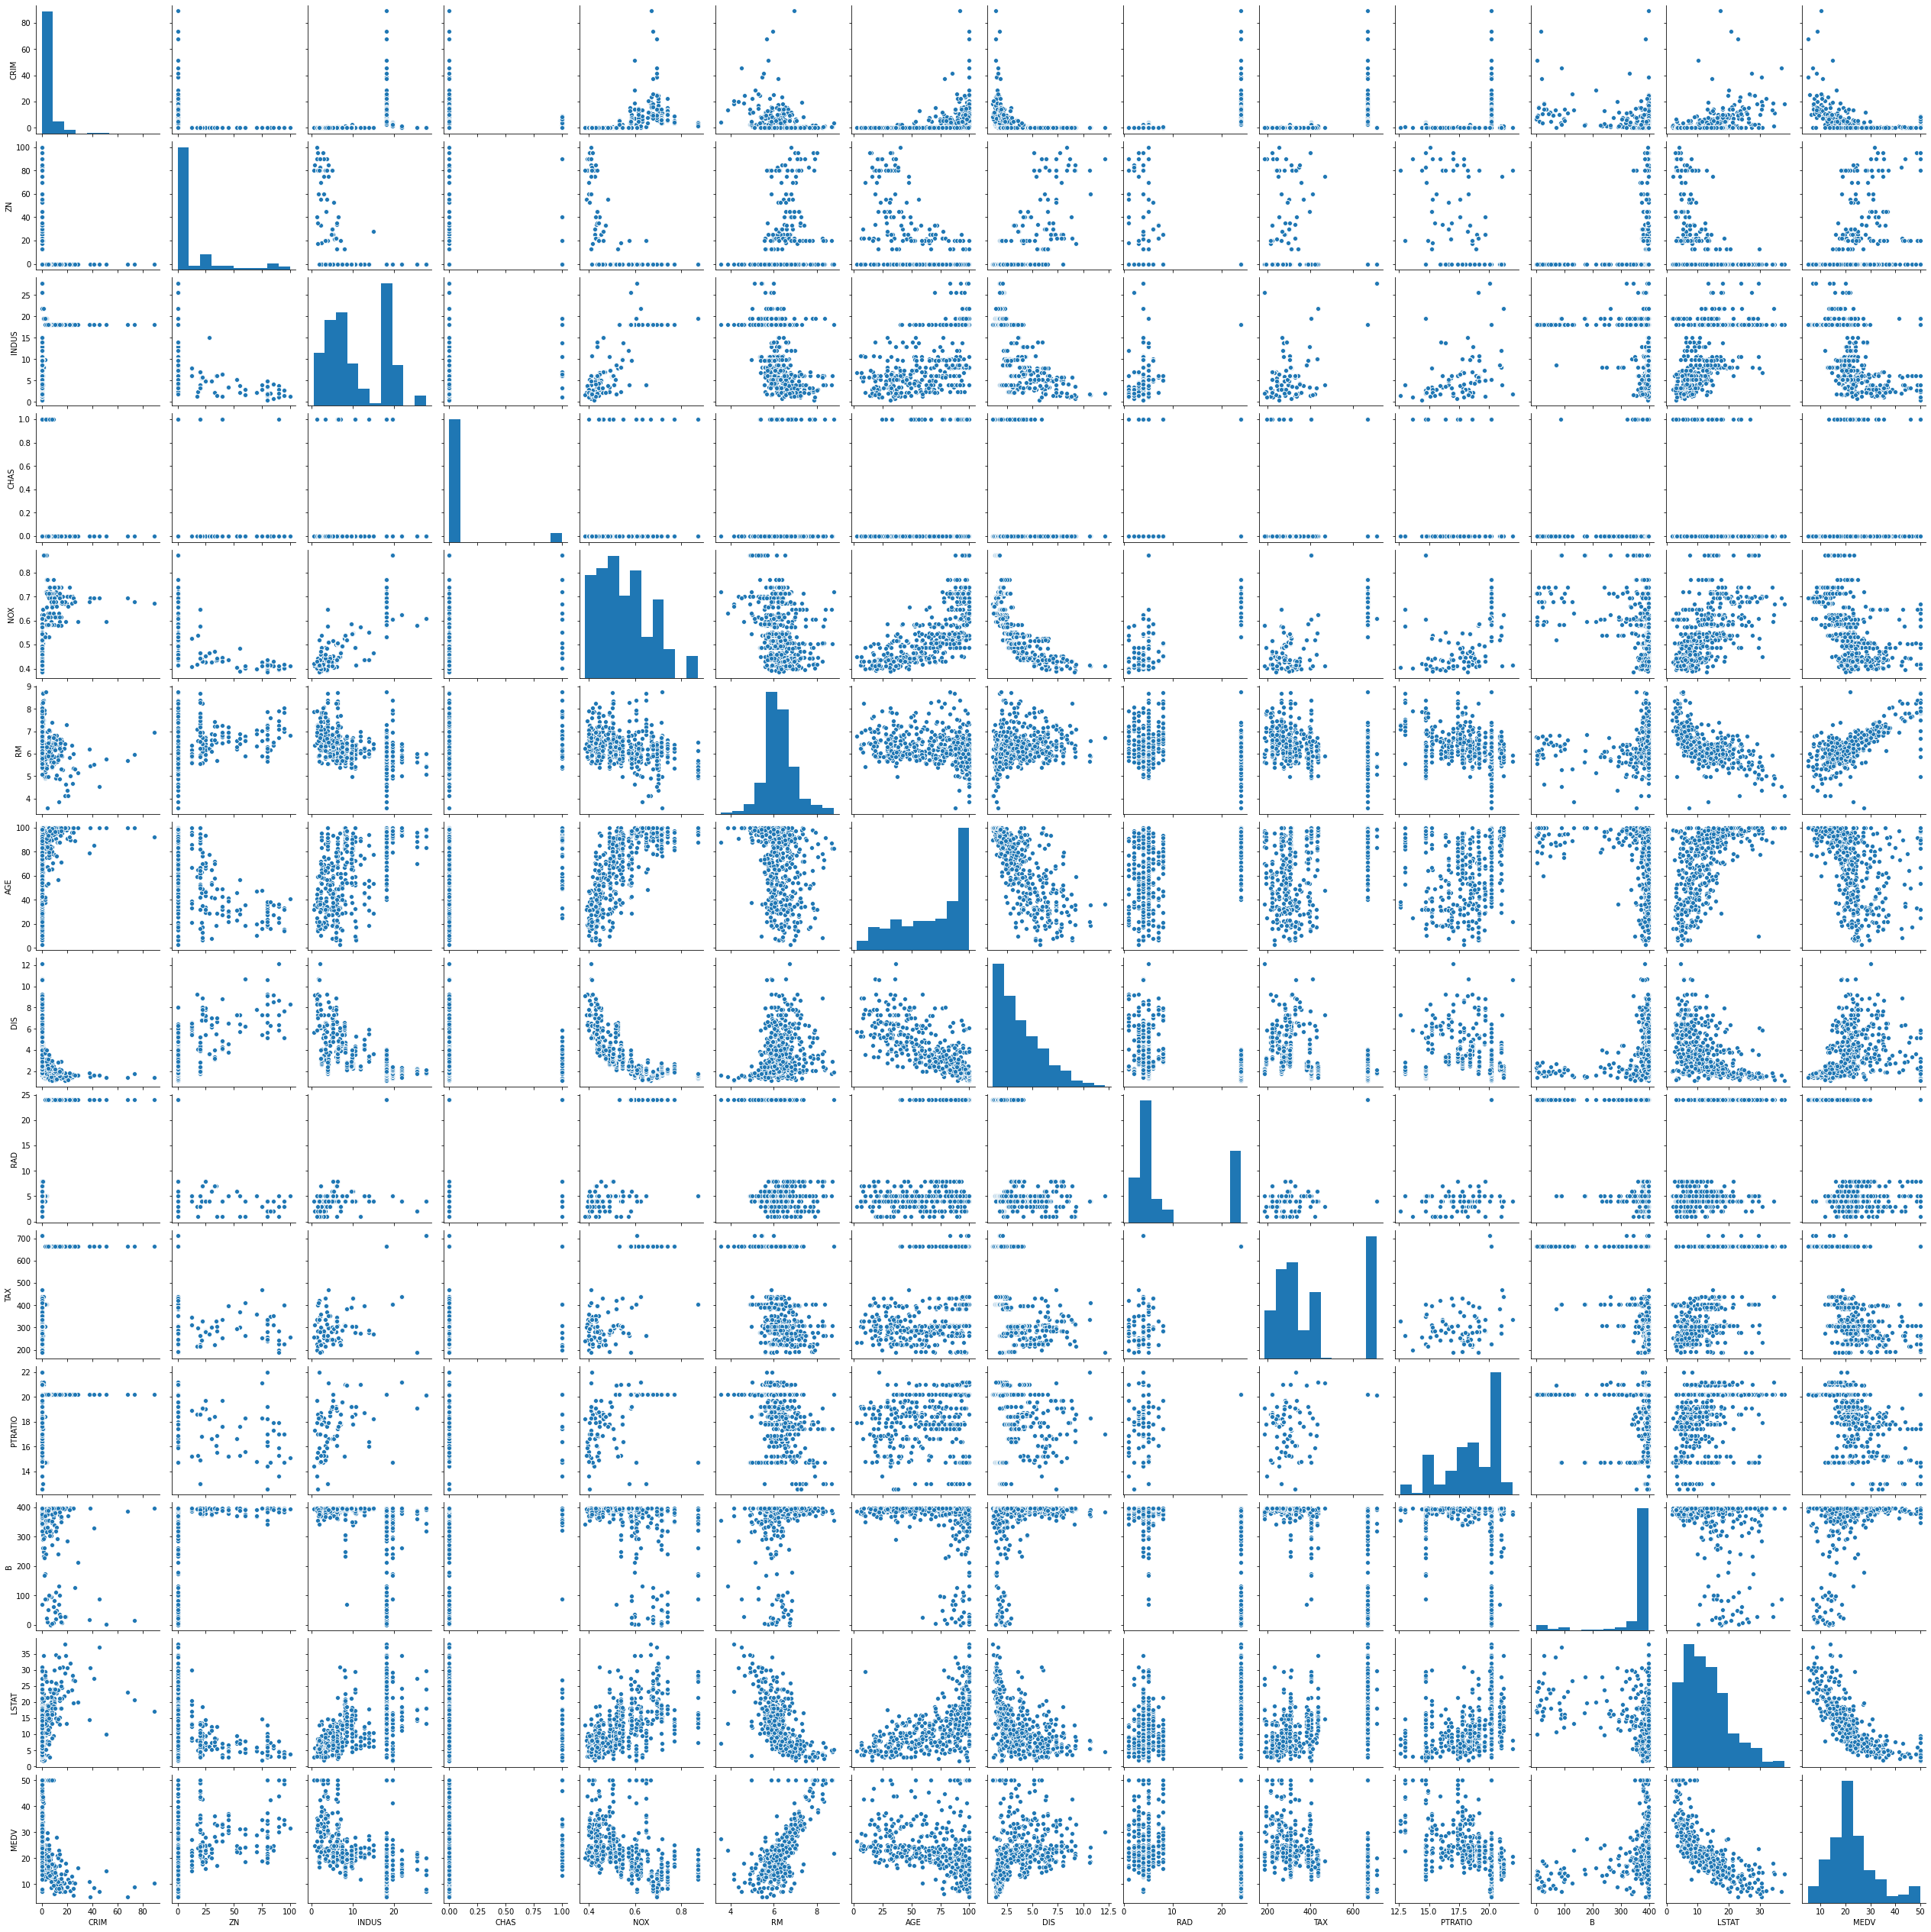

In [6]:
sns.pairplot(df)

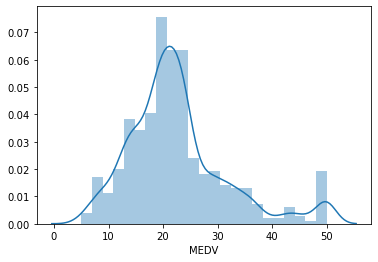

In [7]:
sns.distplot(df['MEDV'])

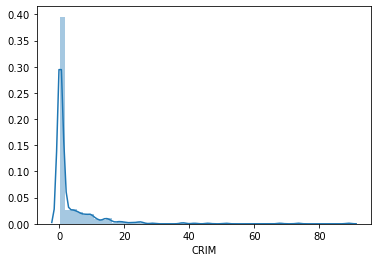

In [8]:
sns.distplot(df['CRIM'])

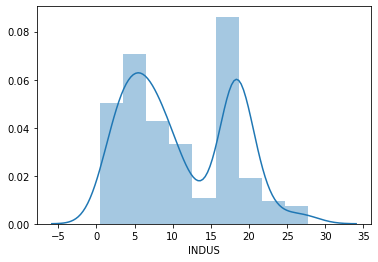

In [9]:
sns.distplot(df['INDUS'])

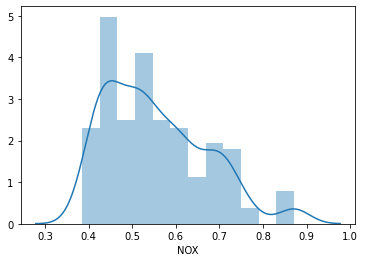

In [10]:
sns.distplot(df['NOX'])

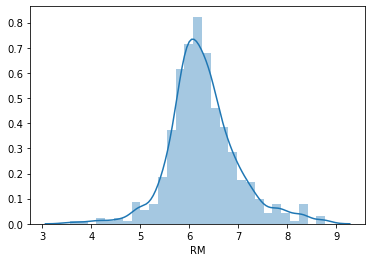

In [11]:
sns.distplot(df['RM'])

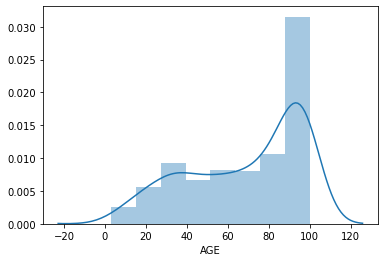

In [12]:
sns.distplot(df['AGE'])

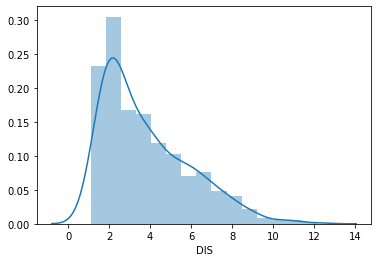

In [13]:
sns.distplot(df['DIS'])

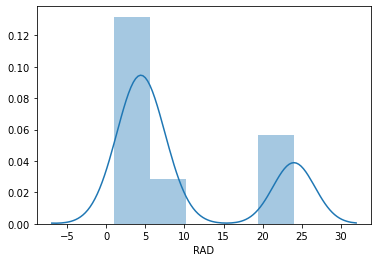

In [14]:
sns.distplot(df['RAD'])

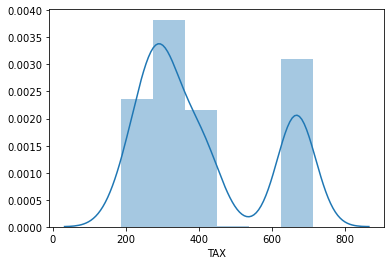

In [15]:
sns.distplot(df['TAX'])

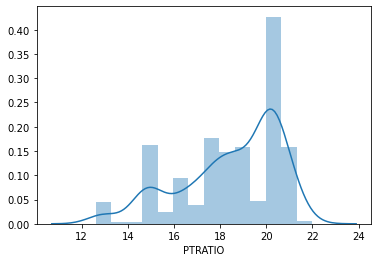

In [16]:
sns.distplot(df['PTRATIO'])

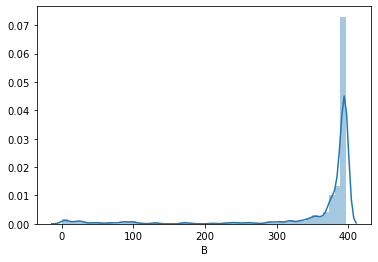

In [17]:
sns.distplot(df['B'])

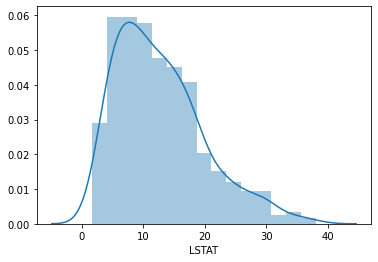

In [18]:
sns.distplot(df['LSTAT'])

As you can see from the graphs above, only MEDV, RM and LSTAT that are actually close to normal distribution

In [19]:
corr = df.corr()

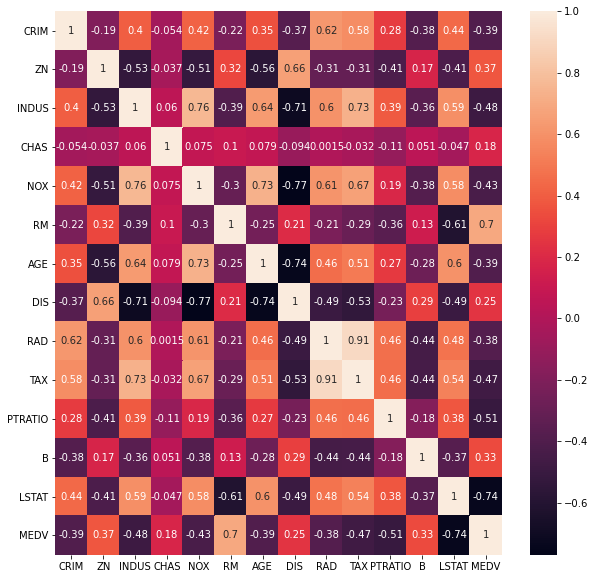

In [20]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, annot=True)
plt.show()

RAD and TAX are highly correlated to each other
MEDV and RM; NOX and INDUS; NOX and AGE; AGE and DIS; TAX AND INDUS; those combination are also correlated pretty highly (equals or more than 70%)

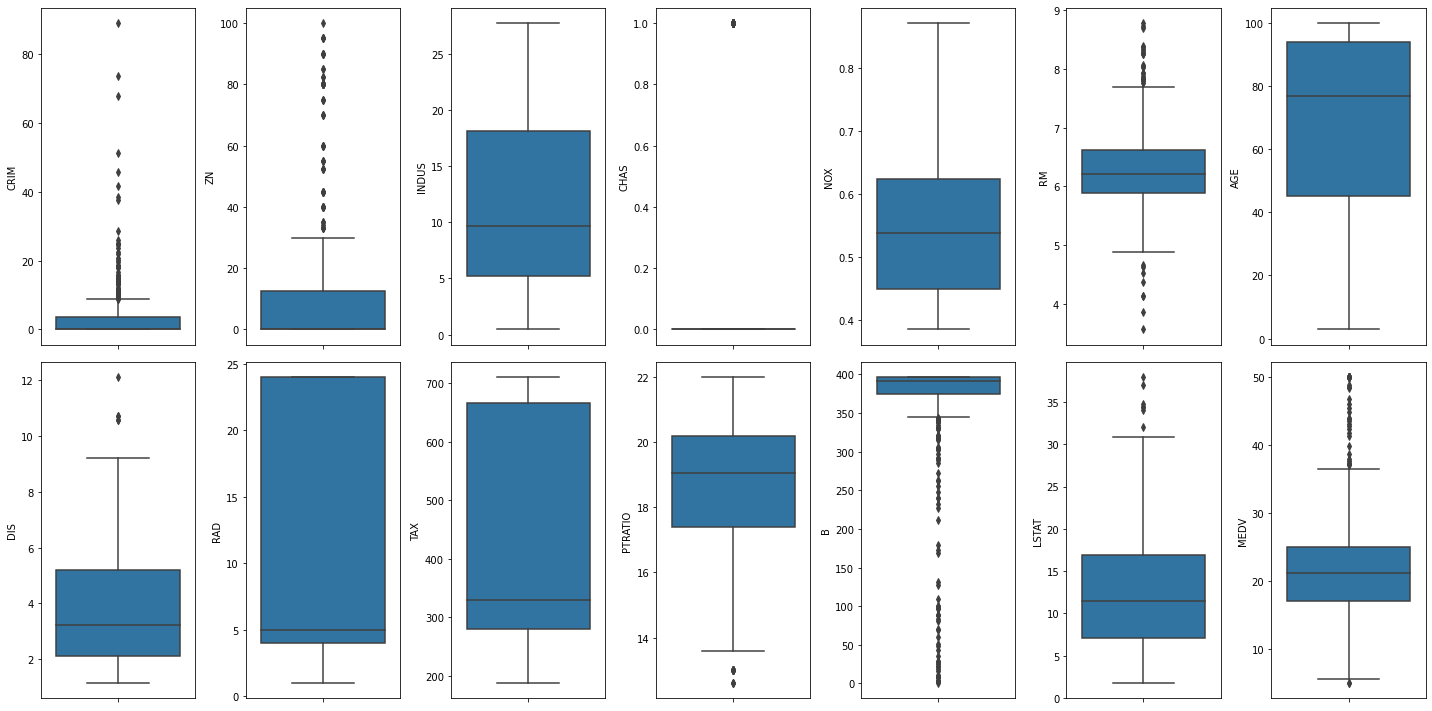

In [21]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20,10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout()

As the boxplot shown above; CRIM, ZN, RM, B and MEDV contain a lot of outliers.

# Filling the missing value with the median value of the column

In [22]:
df.fillna(df.median(), inplace=True)

In [23]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Train and Test split

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X = df.drop('MEDV', axis=1)

In [28]:
y = df['MEDV']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=100)

# Before that the input will be stardardize

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()

In [38]:
X_train = scaler.fit_transform(X_train)

In [39]:
X_test = scaler.transform(X_test)

# Linear Regression Model

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
lm = LinearRegression()

In [44]:
lm.fit(X_train, y_train)

LinearRegression()

In [45]:
y_pred_lm = lm.predict(X_test)

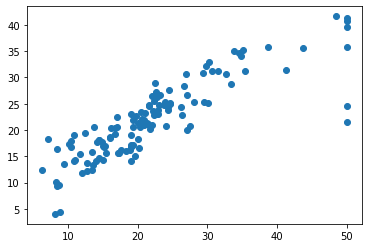

In [46]:
plt.scatter(y_test, y_pred_lm)

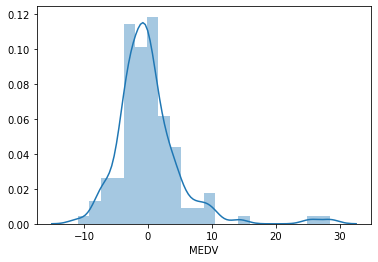

In [47]:
sns.distplot((y_test-y_pred_lm))

In [48]:
from sklearn import metrics

In [49]:
metrics.mean_absolute_error(y_test,y_pred_lm)

3.3664530128776793

In [50]:
metrics.mean_squared_error(y_test,y_pred_lm)

27.486714570897483

In [51]:
np.sqrt(metrics.mean_squared_error(y_test,y_pred_lm))

5.242777371860976

# Random Forest Regressor Model

In [53]:
from sklearn.ensemble import RandomForestRegressor

In [54]:
rfr = RandomForestRegressor(n_estimators=250)

In [55]:
rfr.fit(X_train,y_train)

RandomForestRegressor(n_estimators=250)

In [56]:
y_pred_rfr = rfr.predict(X_test)

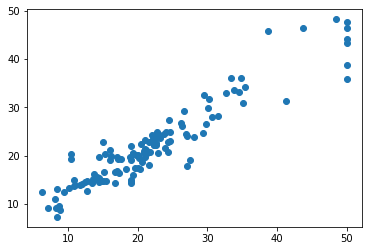

In [58]:
plt.scatter(y_test, y_pred_rfr)

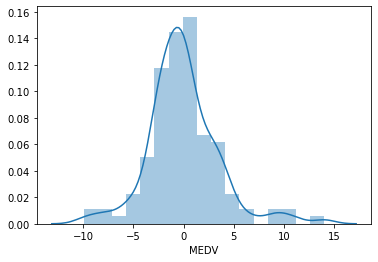

In [59]:
sns.distplot((y_test-y_pred_rfr))

In [57]:
metrics.mean_absolute_error(y_test,y_pred_rfr)

2.484107086614172

In [60]:
metrics.mean_squared_error(y_test,y_pred_rfr)

12.490220512755906

In [61]:
np.sqrt(metrics.mean_squared_error(y_test,y_pred_rfr))

3.534150606971342

# Deep Learning Model

In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [64]:
X_train.shape

(379, 13)

In [65]:
model = Sequential()

model.add(Dense(13,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(3,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [67]:
model.fit(x=X_train,y=y_train,
         validation_data=(X_test,y_test),
         batch_size=128,epochs=400)

Epoch 1/400
3/3 [==============================] - 0s 159ms/step - loss: 594.0779 - val_loss: 579.9067
Epoch 2/400
3/3 [==============================] - 0s 48ms/step - loss: 592.5240 - val_loss: 578.3696
Epoch 3/400
3/3 [==============================] - 0s 53ms/step - loss: 590.8699 - val_loss: 576.8627
Epoch 4/400
3/3 [==============================] - 0s 31ms/step - loss: 589.2453 - val_loss: 575.4055
Epoch 5/400
3/3 [==============================] - 0s 30ms/step - loss: 587.6389 - val_loss: 573.9150
Epoch 6/400
3/3 [==============================] - 0s 29ms/step - loss: 585.9631 - val_loss: 572.3514
Epoch 7/400
3/3 [==============================] - 0s 35ms/step - loss: 584.3163 - val_loss: 570.7628
Epoch 8/400
3/3 [==============================] - 0s 30ms/step - loss: 582.6344 - val_loss: 569.1533
Epoch 9/400
3/3 [==============================] - 0s 25ms/step - loss: 580.9548 - val_loss: 567.5231
Epoch 10/400
3/3 [==============================] - 0s 30ms/step - loss: 579.1262

In [68]:
losses = pd.DataFrame(model.history.history)

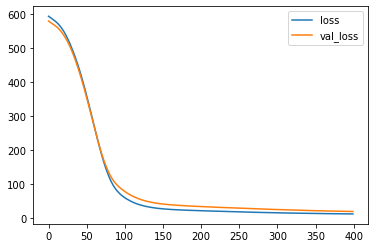

In [69]:
losses.plot()

In [70]:
y_pred_dl = model.predict(X_test)

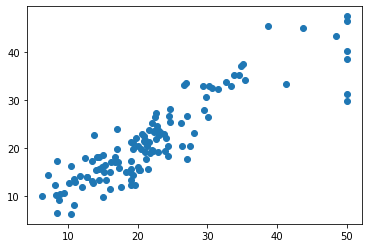

In [71]:
plt.scatter(y_test, y_pred_dl)

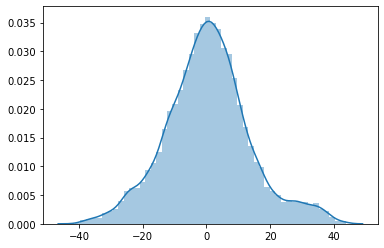

In [78]:
sns.distplot((y_test.values-y_pred_dl))

In [79]:
metrics.mean_absolute_error(y_test,y_pred_dl)

3.2473578828526297

In [80]:
metrics.mean_squared_error(y_test,y_pred_dl)

20.39652906911492

In [81]:
np.sqrt(metrics.mean_absolute_error(y_test,y_pred_dl))

1.8020426972890042

Trying for bigger number of learning itteration

In [83]:
new_model = Sequential()

new_model.add(Dense(13,activation='relu'))
new_model.add(Dense(6,activation='relu'))
new_model.add(Dense(3,activation='relu'))

new_model.add(Dense(1))

new_model.compile(optimizer='adam',loss='mse')

In [84]:
new_model.fit(x=X_train,y=y_train,
         validation_data=(X_test,y_test),
         batch_size=128,epochs=1000)

Epoch 1/1000
3/3 [==============================] - 0s 52ms/step - loss: 608.8297 - val_loss: 595.5724
Epoch 2/1000
3/3 [==============================] - 0s 25ms/step - loss: 606.8767 - val_loss: 593.8934
Epoch 3/1000
3/3 [==============================] - 0s 26ms/step - loss: 604.9597 - val_loss: 592.2906
Epoch 4/1000
3/3 [==============================] - 0s 23ms/step - loss: 603.2179 - val_loss: 590.7284
Epoch 5/1000
3/3 [==============================] - 0s 26ms/step - loss: 601.5265 - val_loss: 589.2781
Epoch 6/1000
3/3 [==============================] - 0s 25ms/step - loss: 600.0162 - val_loss: 587.9452
Epoch 7/1000
3/3 [==============================] - 0s 21ms/step - loss: 598.6156 - val_loss: 586.7194
Epoch 8/1000
3/3 [==============================] - 0s 26ms/step - loss: 597.3996 - val_loss: 585.6377
Epoch 9/1000
3/3 [==============================] - 0s 25ms/step - loss: 596.2252 - val_loss: 584.6760
Epoch 10/1000
3/3 [==============================] - 0s 26ms/step - loss:

In [85]:
new_losses = pd.DataFrame(new_model.history.history)

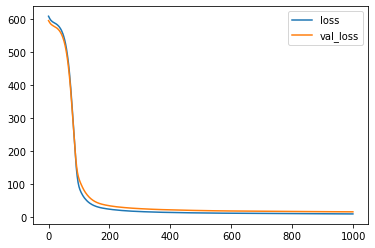

In [86]:
new_losses.plot()

In [87]:
y_pred_newdl = new_model.predict(X_test)

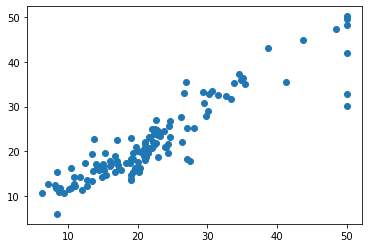

In [88]:
plt.scatter(y_test, y_pred_newdl)

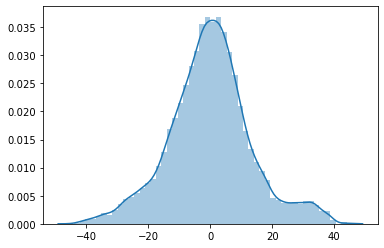

In [89]:
sns.distplot((y_test.values-y_pred_newdl))

In [90]:
metrics.mean_absolute_error(y_test,y_pred_newdl)

2.697075210030623

In [91]:
metrics.mean_squared_error(y_test,y_pred_newdl)

15.377864731384541

In [92]:
np.sqrt(metrics.mean_absolute_error(y_test,y_pred_newdl))

1.6422774461188412